In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from datetime import date

In [5]:
df_train=pd.read_csv('trainData.csv')
df_test=pd.read_csv('testData.csv')

In [6]:
df_test.shape

(1125, 8)

In [7]:
df_train.head()

,Description,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding,Number_of_Days_until_Payment
0,Milk x 7 ltrs,David Taylor,26-04-2011 11:50,26-Apr-11,26-May-11,672.78,672.78,0.0,13
1,Office Stationery,Stephen Wright MD,24-05-2011 09:40,24-May-11,23-Jun-11,5101.98,5101.98,0.0,38
2,Milk x 10 ltrs,Mark Cordova,24-05-2011 12:56,24-Mar-11,23-Apr-11,7422.78,7422.78,0.0,61
3,Annual Fee,Kimberly White,09-07-2011 10:42,10-May-11,24-May-11,11.98,11.98,0.0,62
4,NaN,Teresa Marshall,05-09-2011 20:55,05-Sep-11,06-Sep-11,5501.98,5501.98,0.0,2


In [8]:
df_train.shape

(8753, 9)

<AxesSubplot:xlabel='Amount', ylabel='Density'>

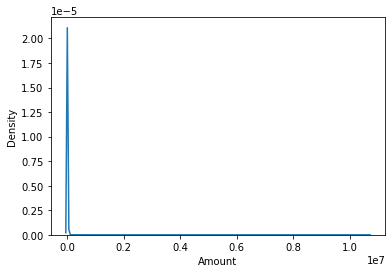

In [9]:
sns.kdeplot(df_train['Amount'])

In [10]:
df_train.groupby(['Vendor_Name']).mean()

,Amount,Settled,Outstanding,Number_of_Days_until_Payment
Vendor_Name,,,,
Aaron Frazier,2221.980000,2201.980000,20.00,4.000000
Aaron Garcia,383.900000,383.900000,0.00,63.000000
Aaron Hoffman,25.730000,25.730000,0.00,25.250000
Aaron Howard,93.330000,93.330000,0.00,6.000000
Aaron Joyce,69.180000,69.180000,0.00,100.000000
...,...,...,...,...
Zachary Johnson,2831.970000,885.310000,1946.66,68.000000
Zachary Simmons,678.780000,58.380000,620.40,38.000000
Zachary Thompson,14001.980000,14001.980000,0.00,64.000000


## dropping description as test data has many categories , which are absent in train data 


In [12]:

df_train.drop('Description', axis=1, inplace=True)
df_test.drop('Description', axis=1, inplace=True)
df_test.head()

,Vendor_Name,Created,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,Aaron Hoffman,26-11-2015 12:38,30-Nov-15,30-Dec-15,11.98,11.98,0.0
1,Aaron Murphy,27-10-2016 10:35,06-Sep-16,06-Oct-16,56.98,56.98,0.0
2,Aaron Parks,29-02-2016 00:53,29-Feb-16,14-Mar-16,61.98,61.98,0.0
3,Aaron Thomas,27-08-2013 18:46,23-Aug-13,06-Sep-13,674.30,674.30,0.0
4,Abigail Hernandez,16-05-2017 16:48,10-May-17,09-Jun-17,302.94,302.94,0.0


## approach 1 - one hot encoding of 10 most frequent vendors

In [13]:
# lst_10=[x for x in df_train.Vendor_Name.value_counts().sort_values(ascending=False).head(10).index]
# for categories in lst_10:
#     df_train[categories]=np.where(df_train['Vendor_Name']==categories,1,0)
#     df_test[categories]=np.where(df_test['Vendor_Name']==categories,1,0)

In [14]:
# df_train.drop('Vendor_Name', axis=1, inplace=True)
# df_test.drop('Vendor_Name', axis=1, inplace=True)
# df_test.head()

## approach 2 - frequency encoding for vendor names

In [15]:
# Vendor_Name_map=df_train['Vendor_Name'].value_counts().to_dict()
# df_train['Vendor_Name']=df_train['Vendor_Name'].map(Vendor_Name_map)
# df_train.head()

In [16]:
# df_test['Vendor_Name']=df_test['Vendor_Name'].map(Vendor_Name_map)
# df_test.head()

## dropping created

In [17]:
df_train.drop('Created', axis=1, inplace=True)
df_test.drop('Created', axis=1, inplace=True)
df_test.head()

,Vendor_Name,Invoice_Date,Due_Date,Amount,Settled,Outstanding
0,Aaron Hoffman,30-Nov-15,30-Dec-15,11.98,11.98,0.0
1,Aaron Murphy,06-Sep-16,06-Oct-16,56.98,56.98,0.0
2,Aaron Parks,29-Feb-16,14-Mar-16,61.98,61.98,0.0
3,Aaron Thomas,23-Aug-13,06-Sep-13,674.30,674.30,0.0
4,Abigail Hernandez,10-May-17,09-Jun-17,302.94,302.94,0.0


## calculating number of days between invoice date and due date

In [18]:
dic={'Apr':4, 'May':5, 'Mar':3, 'Sep':9, 'Oct':10, 'Nov':11, 'Jan':1, 'Feb':2, 'Jun':6,
       'Jul':7, 'Aug':8, 'Dec':12}
def date_diff(df,variable):
        df[variable+'date']=(df[variable].astype(str).str[0:2]).astype(int)
        df[variable+'mon']=(df[variable].astype(str).str[3:6]).map(dic)
        df[variable+'year']=2000+(df[variable].astype(str).str[7:9]).astype(int)

In [19]:
def delta(df):
    list=[]
    for i in range(0,len(df)):
        y=df['Invoice_Dateyear'][i]
        m=df['Invoice_Datemon'][i]
        d=df['Invoice_Datedate'][i]
        y1=df['Due_Dateyear'][i]
        m1=df['Due_Datemon'][i]
        d1=df['Due_Datedate'][i]

        f_date = date(y,m,d)
        l_date = date(y1, m1, d1)
        delta = l_date - f_date
        list.append(delta.days)
    df['day_diff']=np.array(list)
    df.drop(['Invoice_Date','Due_Date','Invoice_Dateyear','Invoice_Datemon','Invoice_Datedate','Due_Dateyear','Due_Datemon','Due_Datedate'], axis=1, inplace=True)

   

In [20]:
date_diff(df_train,'Invoice_Date')
date_diff(df_train,'Due_Date')
delta(df_train)
date_diff(df_test,'Invoice_Date')
date_diff(df_test,'Due_Date')
delta(df_test)

In [21]:
df_test.head()

,Vendor_Name,Amount,Settled,Outstanding,day_diff
0,Aaron Hoffman,11.98,11.98,0.0,30
1,Aaron Murphy,56.98,56.98,0.0,30
2,Aaron Parks,61.98,61.98,0.0,14
3,Aaron Thomas,674.30,674.30,0.0,14
4,Abigail Hernandez,302.94,302.94,0.0,30


In [22]:
df_train.head()

,Vendor_Name,Amount,Settled,Outstanding,Number_of_Days_until_Payment,day_diff
0,David Taylor,672.78,672.78,0.0,13,30
1,Stephen Wright MD,5101.98,5101.98,0.0,38,30
2,Mark Cordova,7422.78,7422.78,0.0,61,30
3,Kimberly White,11.98,11.98,0.0,62,14
4,Teresa Marshall,5501.98,5501.98,0.0,2,1


## Scaling

In [23]:
# from sklearn.preprocessing import StandardScaler
# result=pd.concat([df_train,df_test])
# scaler=StandardScaler()
# df_scaler=pd.DataFrame(scaler.fit_transform(result),columns=result.columns)


# df_scaler_test=pd.DataFrame(scaler.fit_transform(x_test),columns=x_test.columns)
# df_scaler_train=pd.DataFrame(scaler.fit_transform(x_train),columns=x_train.columns)


In [24]:
# df_scaler.tail(10)

In [25]:
# df_scaler_train=df_scaler.iloc[0:len(df_train)]
# df_scaler_train.head()

In [26]:
# df_scaler_test=df_scaler.iloc[len(df_train):]
# df_scaler_test.head()

In [27]:
# x_test=df_scaler_test
# x_train=df_scaler_train

## approach 3 - dropping day_diff

In [28]:
## drop day_diff    -- bad performance(score)

In [29]:
# df_train.drop('day_diff', axis=1, inplace=True)
# df_test.drop('day_diff', axis=1, inplace=True)
# df_test.head()

## approach 4- making new feature by mean target encoding of number of days for all vendors

In [30]:
## new feature - mean  --- overfitting -- 10.583 (0.446) but score on leaderboard is 27
# df_train2=pd.read_csv('trainData.csv', usecols=['Vendor_Name','Number_of_Days_until_Payment'])
# a=df_train2.groupby('Vendor_Name').mean()
# d_mean=dict(zip(a.index, a.Number_of_Days_until_Payment))

In [31]:
# df_test['new']=df_test['Vendor_Name'].map(d_mean)
# df_train['new']=df_train['Vendor_Name'].map(d_mean)  



## approach 5 - making new feature by median target encoding of number of days for all vendors

In [32]:
# ## new feature - median -- 10.555 (0.413)-----26.94769---overfitting
# df_train2=pd.read_csv('trainData.csv', usecols=['Vendor_Name','Number_of_Days_until_Payment'])
# a=df_train2.groupby('Vendor_Name').median()
# d_median=dict(zip(a.index, a.Number_of_Days_until_Payment))

In [33]:
# df_test['new']=df_test['Vendor_Name'].map(d_median)
# df_train['new']=df_train['Vendor_Name'].map(d_median)  


## approach 6- adding a new feature and dropping outstanding

In [34]:
##   Mean MAE: 18.634  

In [35]:
# df_train['new']=df_train['Settled']/df_train['Amount']
# df_test['new']=df_test['Settled']/df_test['Amount']
# df_test.drop('Outstanding', axis=1, inplace=True)
# df_train.drop('Outstanding', axis=1, inplace=True)

## approach 7 - encoding vendor name 

In [36]:
## encoding vendor name----- best---18.638 (0.448)

In [37]:
d=df_train.Vendor_Name.value_counts().sort_values(ascending=False).to_dict()
li= d.keys()
c=3276
di={}
for i in  li:
    di[i]=c*d[i]
    c=c-1
df_test['Vendor_Name']=df_test['Vendor_Name'].map(di)
df_train['Vendor_Name']=df_train['Vendor_Name'].map(di)  


In [38]:
df_train= df_train.loc[df_train['Number_of_Days_until_Payment']>0]
y_train=df_train[['Number_of_Days_until_Payment']]
df_train.drop(['Number_of_Days_until_Payment','Settled'], axis=1, inplace=True)
df_test.drop('Settled', axis=1, inplace=True)


## Model

       MODEL                  Score
1. linear regression         27.16954
2. svm                       27.27141 
3. knn                       28.69687
4. decision tree             30.93556
5. xgboost                   26.59666

In [40]:
## without scaling 
x_test=df_test
x_train=df_train

In [41]:
type(y_train)

pandas.core.frame.DataFrame

In [42]:
x=np.array(x_train)
y=np.array(y_train['Number_of_Days_until_Payment'])


In [43]:
import xgboost
from numpy import absolute
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor
model = XGBRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 18.638 (0.448)


In [44]:
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=16,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [45]:
y_test=model.predict(np.array(x_test))

In [46]:
test=pd.read_csv('testData.csv')
pred=test[['Vendor_Name']]
pred['Number_of_Days_until_Payment']=y_test
pred=pred.set_index('Vendor_Name')
for i,k in enumerate(pred['Number_of_Days_until_Payment'],0):
    pred.iloc[i,0] = round(k)
 

In [47]:
pred.head()

,Number_of_Days_until_Payment
Vendor_Name,
Aaron Hoffman,4.0
Aaron Murphy,36.0
Aaron Parks,31.0
Aaron Thomas,35.0
Abigail Hernandez,48.0


In [48]:
pred.to_csv('submission.csv')